<a href="https://colab.research.google.com/github/shailendrarg/Deep-learning/blob/master/VGG16_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import keras 
import tensorflow as tf
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_path ="/content/drive/My Drive/Machine Learning/Image classification/CatsvsDogs/train_data"


In [41]:
train_batches= ImageDataGenerator().flow_from_directory(train_path,target_size=(100,100),classes=["Cat","Dog"],batch_size=200)

Found 202 images belonging to 2 classes.


In [0]:
images,labels=next(train_batches)

In [43]:
images.shape

(200, 100, 100, 3)

In [44]:
labels.shape

(200, 2)

In [0]:
from keras.applications import VGG16
#we need to provide our image input shape to model
vgg16=VGG16(include_top=False,weights="imagenet",input_shape=(100,100,3))

In [0]:
#no need to train the layers as we are using pre trained VGG
for layer in vgg16.layers:
    layer.trainable=False

In [0]:
from keras.models import Sequential
model=Sequential()

In [0]:
for layer in vgg16.layers:
    model.add(layer)


In [49]:
from keras.layers import Dense,Flatten
model.add(Flatten())
model.add(Dense(2,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 25, 25, 256)       295168    
__________

In [0]:
from keras.metrics import *
model.compile(loss="binary_crossentropy",optimizer="adam")

In [51]:
history=model.fit_generator(train_batches,steps_per_epoch=10,epochs=10)

Epoch 1/10
10/10 [==============================] - 4s 383ms/step - loss: 1.6279
Epoch 2/10
10/10 [==============================] - 4s 366ms/step - loss: 1.1912
Epoch 3/10
10/10 [==============================] - 4s 362ms/step - loss: 0.3208
Epoch 4/10
10/10 [==============================] - 4s 363ms/step - loss: 0.2114
Epoch 5/10
10/10 [==============================] - 4s 366ms/step - loss: 1.6698
Epoch 6/10
10/10 [==============================] - 4s 367ms/step - loss: 0.2184
Epoch 7/10
10/10 [==============================] - 4s 370ms/step - loss: 0.2182
Epoch 8/10
10/10 [==============================] - 4s 376ms/step - loss: 0.2182
Epoch 9/10
10/10 [==============================] - 4s 379ms/step - loss: 0.2182
Epoch 10/10
10/10 [==============================] - 4s 378ms/step - loss: 0.2182


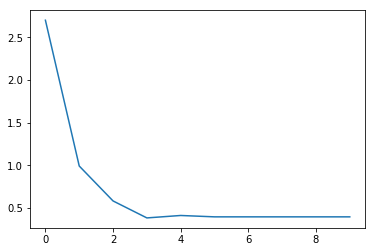

In [52]:
plt.plot(history.history["loss"])